# Pandas for Astronomers:  Part I

This notebook is an introductory exercise in data analaysis in Python, using a dataset from astronomy.

The data are a collection of supernovae, distances, and redshifts of their containing galaxies.
From these we can very roughly reproduce Edwin Hubble's famous discovery that the universe is 
expanding, and maybe even estimate Hubble's Constant $H_0$.

I found the data (and the idea) in Azalee Boestrom's workshop, https://github.com/abostroem/2018-01-07-aas.

* Download the dataset directly from here: https://github.com/abostroem/2018-01-07-aas/blob/gh-pages/data/hubble_data.dat

See https://www.cfa.harvard.edu/~dfabricant/huchra/hubble/ for some history about Hubble's Constant.

In [1]:
%pwd

'C:\\Users\\rdickson\\Desktop\\pandas-and-astro\\jupyter_notebooks'

In [2]:
%cd ~/Desktop/2018-01-07-aas

C:\Users\rdickson\Desktop\2018-01-07-aas


In [3]:
%cd data

C:\Users\rdickson\Desktop\2018-01-07-aas\data


In [4]:
%ls

 Volume in drive C has no label.
 Volume Serial Number is BC0F-CEF1

 Directory of C:\Users\rdickson\Desktop\2018-01-07-aas\data

2018-11-01  03:07 PM    <DIR>          .
2018-11-01  03:07 PM    <DIR>          ..
2018-11-01  03:07 PM                 0 .gitkeep
2018-11-01  03:07 PM             1,142 hubble_data.dat
               2 File(s)          1,142 bytes
               2 Dir(s)  188,365,381,632 bytes free


## Load the package. Load the data.

We're going to use `pandas` as our data analysis tool today.  From the pandas documentation (https://pandas.pydata.org/pandas-docs/stable/index.html):

> pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python.

* Make sure you can `import pandas`
* Read in the Hubble dataset using `pandas.read_csv(...)`

In [5]:
import pandas

In [6]:
data = pandas.read_csv('hubble_data.dat')

In [7]:
data

,M101 2011fe 13.310 0.117 29.135 0.045 -19.389 0.125 241
0,N1015 2009ig 17.015 0.123 32.497 0.081 -19.047...
1,N1309 2002fk 16.756 0.116 32.523 0.055 -19.331...
2,N1365 2012fr 15.482 0.125 31.307 0.057 -19.390...
3,N1448 2001el 15.765 0.116 31.311 0.045 -19.111...
4,N2442 2015F 15.840 0.142 31.511 0.053 -19.236 ...
5,N3021 1995al 16.527 0.117 32.498 0.090 -19.535...
6,N3370 1994ae 16.476 0.115 32.072 0.049 -19.161...
7,N3447 2012ht 16.265 0.124 31.908 0.043 -19.207...
8,N3972 2011by 16.048 0.116 31.587 0.070 -19.103...
9,N3982 1998aq 15.795 0.115 31.737 0.069 -19.507...


We read the data in okay, but the column headers are all wrong.  What happened?

`pandas` used the first row as column headers, but the data file we're using doesn't have explicit headers.  This is a problem with the data file, but that's the way it is sometimes.  What should the column headers be?  I found them by searching through the workshop notes. (https://github.com/abostroem/2018-01-07-aas/blob/gh-pages/etherpad/2018-01-07-aas_day1.txt)

How do you impose column headers on this data?  The answer is in the documentation for `pandas.read_csv()`.  

In [8]:
?pandas.read_csv

In [9]:
data = pandas.read_csv('hubble_data.dat',
        names=['galaxy', 'supernova', 'm', 'sig_m',  'dist_mod', 'sig_dist_mod', 'M', 'sig_M', 'velocity'])
data

,galaxy,supernova,m,sig_m,dist_mod,sig_dist_mod,M,sig_M,velocity
0,M101 2011fe 13.310 0.117 29.135 0.045 -19.389 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N1015 2009ig 17.015 0.123 32.497 0.081 -19.047...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N1309 2002fk 16.756 0.116 32.523 0.055 -19.331...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N1365 2012fr 15.482 0.125 31.307 0.057 -19.390...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N1448 2001el 15.765 0.116 31.311 0.045 -19.111...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,N2442 2015F 15.840 0.142 31.511 0.053 -19.236 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,N3021 1995al 16.527 0.117 32.498 0.090 -19.535...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,N3370 1994ae 16.476 0.115 32.072 0.049 -19.161...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,N3447 2012ht 16.265 0.124 31.908 0.043 -19.207...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,N3972 2011by 16.048 0.116 31.587 0.070 -19.103...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Still not there:  Now all the data is in the first column and the rest are "Not A Number".  Back to the documentation... 

We need to tell `pandas` to understand whitespace as a delimiter; that is, a column separator.

In [10]:
data = pandas.read_csv('hubble_data.dat', delim_whitespace=True,
                       names=['galaxy', 'supernova', 'm', 'sig_m',  'dist_mod', 'sig_dist_mod', 'M', 'sig_M', 'velocity'])
data

,galaxy,supernova,m,sig_m,dist_mod,sig_dist_mod,M,sig_M,velocity
0,M101,2011fe,13.310,0.117,29.135,0.045,-19.389,0.125,241
1,N1015,2009ig,17.015,0.123,32.497,0.081,-19.047,0.147,2629
2,N1309,2002fk,16.756,0.116,32.523,0.055,-19.331,0.128,2136
3,N1365,2012fr,15.482,0.125,31.307,0.057,-19.390,0.137,1636
4,N1448,2001el,15.765,0.116,31.311,0.045,-19.111,0.125,1168
5,N2442,2015F,15.840,0.142,31.511,0.053,-19.236,0.152,1466
6,N3021,1995al,16.527,0.117,32.498,0.090,-19.535,0.147,1541
7,N3370,1994ae,16.476,0.115,32.072,0.049,-19.161,0.125,1279
8,N3447,2012ht,16.265,0.124,31.908,0.043,-19.207,0.131,1067
9,N3972,2011by,16.048,0.116,31.587,0.070,-19.103,0.136,852


That looks better.

## What's a "data frame"?

The data frame is a table with cases (or samples, or instances) in the rows.  Each case has one or more observations (or measurements, or features, or fields) in the columns.  The measurements may be numerical, or categorical, or textual, or even missing.  This is one of the things that distinguishes a data frame from a NumPy (or C or Fortran) array, in which all the values must be of a single type. 

Another thing that distinguishes a data frame (at least in pandas) is that the rows can be labelled, rather than just using integer indices. 

### EXERCISE

* Is the first column (`galaxy`) appropriate labels for these data, or not? Is there a field that would make better labels?
* Reload the data using a different field as the instance labels.  You might want to consult `?pandas.read_csv`

There's nothing preventing two supernovas occuring in one galaxy--- except chance---but case labels should be unique. While we have no duplicate `galaxy` entries right here right now, it still seems like a poor choice in the long run.  On the other hand the supernova designations *are* meant to be universally unique, so let's use `supernova` as the case label. (Second column, which is column index 1, because zero-based indexing.)  

This'll be the last time we re-load this data file, I promise :-)

In [11]:
data = pandas.read_csv('hubble_data.dat', delim_whitespace=True, index_col=1,
                       names=['galaxy', 'supernova', 'm', 'sig_m',  'dist_mod', 'sig_dist_mod', 'M', 'sig_M', 'velocity'])
data

,galaxy,m,sig_m,dist_mod,sig_dist_mod,M,sig_M,velocity
supernova,,,,,,,,
2011fe,M101,13.310,0.117,29.135,0.045,-19.389,0.125,241
2009ig,N1015,17.015,0.123,32.497,0.081,-19.047,0.147,2629
2002fk,N1309,16.756,0.116,32.523,0.055,-19.331,0.128,2136
2012fr,N1365,15.482,0.125,31.307,0.057,-19.390,0.137,1636
2001el,N1448,15.765,0.116,31.311,0.045,-19.111,0.125,1168
2015F,N2442,15.840,0.142,31.511,0.053,-19.236,0.152,1466
1995al,N3021,16.527,0.117,32.498,0.090,-19.535,0.147,1541
1994ae,N3370,16.476,0.115,32.072,0.049,-19.161,0.125,1279
2012ht,N3447,16.265,0.124,31.908,0.043,-19.207,0.131,1067


There are a bunch of ways to retrieve parts of a dataframe.  `df.loc` is for retrieving labelled cases, `df.iloc` is for retrieving cases by index:

In [12]:
print(data.loc['1990N'])
print(data.iloc[1])

galaxy           N4639
m               15.983
sig_m            0.115
dist_mod        31.532
sig_dist_mod     0.071
M              -19.113
sig_M            0.135
velocity          1018
Name: 1990N, dtype: object
galaxy           N1015
m               17.015
sig_m            0.123
dist_mod        32.497
sig_dist_mod     0.081
M              -19.047
sig_M            0.147
velocity          2629
Name: 2009ig, dtype: object


Just want a column?  Two ways to do that:

In [13]:
print(data['M'])
print(data.M)

supernova
2011fe   -19.389
2009ig   -19.047
2002fk   -19.331
2012fr   -19.390
2001el   -19.111
2015F    -19.236
1995al   -19.535
1994ae   -19.161
2012ht   -19.207
2011by   -19.103
1998aq   -19.507
2007sr   -19.058
2012cg   -19.534
1981B    -19.293
1990N    -19.113
2007af   -19.085
2005cf   -19.255
2013dy   -19.196
2003du   -19.449
Name: M, dtype: float64
supernova
2011fe   -19.389
2009ig   -19.047
2002fk   -19.331
2012fr   -19.390
2001el   -19.111
2015F    -19.236
1995al   -19.535
1994ae   -19.161
2012ht   -19.207
2011by   -19.103
1998aq   -19.507
2007sr   -19.058
2012cg   -19.534
1981B    -19.293
1990N    -19.113
2007af   -19.085
2005cf   -19.255
2013dy   -19.196
2003du   -19.449
Name: M, dtype: float64


Individual elements can be accessed with `df.iat` or `df.at`:

In [14]:
print("data.iat[1,6]:",data.iat[1,6])
print("data.at['2003du','M']:",data.at['2003du','M'])

data.iat[1,6]: 0.147
data.at['2003du','M']: -19.449


But if you can write your code to avoid referencing individual elements, you should.  Pandas has lots of functions that operate on rows or columns or whole dataframes:

In [15]:
data.mean()

m                 15.951789
sig_m              0.118263
dist_mod          31.650579
sig_dist_mod       0.077579
M                -19.263158
sig_M              0.146053
velocity        1402.684211
dtype: float64

## Visualization

Pandas uses `matplotlib`, the same plotting package used in the rest of the Numpy/Scipy community.

In [16]:
from matplotlib import pyplot as plt
plt.plot(data['dist_mod'], data['velocity'], 'o')

There's the plot we want, sort of.  Problem is that the x-axis is not distance but distance modulus (https://lco.global/spacebook/what-is-distance-modulus/).  What we'd like to plot is velocity in km/sec versus distance in Mpc. Here's where you can put your earlier Python training to use.
### EXERCISE
* Write a function which converts distance_modulus into distance.

In [17]:
def distance_from_modulus(dist_mod):
    parsecs = 10**((dist_mod+5)/5)
    return parsecs

In [18]:
data['dist_mod']

supernova
2011fe    29.135
2009ig    32.497
2002fk    32.523
2012fr    31.307
2001el    31.311
2015F     31.511
1995al    32.498
1994ae    32.072
2012ht    31.908
2011by    31.587
1998aq    31.737
2007sr    31.290
2012cg    31.080
1981B     30.906
1990N     31.532
2007af    31.786
2005cf    32.263
2013dy    31.499
2003du    32.919
Name: dist_mod, dtype: float64

In [19]:
distance = distance_from_modulus(data['dist_mod'])

In [20]:
print(distance)

supernova
2011fe    6.714289e+06
2009ig    3.157912e+07
2002fk    3.195950e+07
2012fr    1.825576e+07
2001el    1.828942e+07
2015F     2.005395e+07
1995al    3.159366e+07
1994ae    2.596570e+07
2012ht    2.407687e+07
2011by    2.076825e+07
1998aq    2.225359e+07
2007sr    1.811340e+07
2012cg    1.644372e+07
1981B     1.517749e+07
1990N     2.024883e+07
2007af    2.276145e+07
2005cf    2.835306e+07
2013dy    1.994344e+07
2003du    3.835306e+07
Name: dist_mod, dtype: float64


Those were in ParSecs, convert them to MegaParSecs

In [21]:
print(distance/1.e6)

supernova
2011fe     6.714289
2009ig    31.579118
2002fk    31.959502
2012fr    18.255763
2001el    18.289423
2015F     20.053953
1995al    31.593664
1994ae    25.965698
2012ht    24.076868
2011by    20.768255
1998aq    22.253586
2007sr    18.113401
2012cg    16.443717
1981B     15.177492
1990N     20.248833
2007af    22.761454
2005cf    28.353064
2013dy    19.943437
2003du    38.353058
Name: dist_mod, dtype: float64


We can add the distances to the data frame easily:

In [22]:
data['distance'] = distance/1.e6
data

,galaxy,m,sig_m,dist_mod,sig_dist_mod,M,sig_M,velocity,distance
supernova,,,,,,,,,
2011fe,M101,13.310,0.117,29.135,0.045,-19.389,0.125,241,6.714289
2009ig,N1015,17.015,0.123,32.497,0.081,-19.047,0.147,2629,31.579118
2002fk,N1309,16.756,0.116,32.523,0.055,-19.331,0.128,2136,31.959502
2012fr,N1365,15.482,0.125,31.307,0.057,-19.390,0.137,1636,18.255763
2001el,N1448,15.765,0.116,31.311,0.045,-19.111,0.125,1168,18.289423
2015F,N2442,15.840,0.142,31.511,0.053,-19.236,0.152,1466,20.053953
1995al,N3021,16.527,0.117,32.498,0.090,-19.535,0.147,1541,31.593664
1994ae,N3370,16.476,0.115,32.072,0.049,-19.161,0.125,1279,25.965698
2012ht,N3447,16.265,0.124,31.908,0.043,-19.207,0.131,1067,24.076868


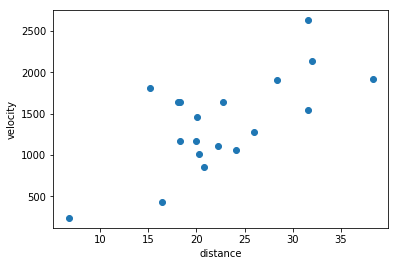

In [23]:
plt.plot(data.distance, data.velocity, 'o')
plt.xlabel('distance')
plt.ylabel('velocity')
plt.show()

Now we want to find a straight-line fit for this.  How do we find a function that does this?  Google throws up several suggestions, including numpy.polyfit, numpy.polynomial.Polynomial.fit, something else from scikit-learn, and statsmodels. 

After a LOT of reading, I decided to go with numpy.polyfit as it looks like the simplest. See http://stamfordresearch.com/linear-regression-using-pandas-python/ for an example.

In [24]:
import numpy
model = numpy.polyfit(data.distance, data.velocity, 1)
print(model)

[ 53.6296996  186.40616205]


### EXERCISE
* Interpret the output of numpy.polyfit(). Remember, you can get the documentation with `?numpy.polyfit`.
* What is the slope of our line of best fit?
* Have we found a reasonable estimate of the Hubble parameter? 

In [25]:
?numpy.polyfit

`numpy.polyfit` emits the polynomial coefficients, highest order first--- or in our case, slope, then intercept.  A slope of 53.6 fits in quite nicely with the Hubble parameter estimates shown at  https://www.cfa.harvard.edu/~dfabricant/huchra/hubble/ --- with one assumption:  We don't know what the units are on the `velocity` field, because our data source didn't tell us!  But if it's in km/s, then we're golden.

Let's also visualize our fit.  To do this, we apply the model equation to the y-data (the distances) to compute the model velocity at each point.  Then plot it as a line using the oddly intuitive matplotlib format `-` to signify you want a line.  Copy-and-paste the code we wrote earlier for the scatterplot to complete the plot with points.

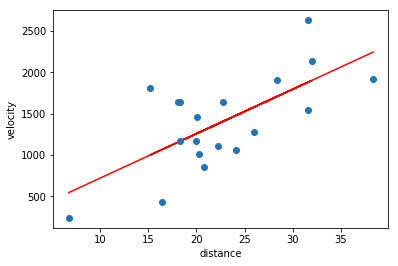

In [26]:
velocity_fit = model[0]*data.distance + model[1]
plt.plot(data.distance, velocity_fit, 'r-')

plt.plot(data.distance, data.velocity, 'o')
plt.xlabel('distance')
plt.ylabel('velocity')
plt.show()

### OPTIONAL EXERCISE
Adjust the axis limits on the plot so that both zero velocity and zero distance are visible.

### OPTIONAL EXERCISE
Our y-intercept is 186 (km/sec, we think).  Is that reasonable?  If you think not, can you figure out how to get a new fit that constrains the intercept to be zero?

My solution is below; others are certainly possible.  Remember all those suggestions Google gave us for straight-line fit routines?

In [27]:
import statsmodels.api as sm
x = data['distance']
y = data['velocity']
# x = sm.add_constant(x)  # in for mx+b, omit to force zero intercept
model = sm.OLS(y, x).fit()

In [28]:
print(model.predict(x))

supernova
2011fe     410.292166
2009ig    1929.715231
2002fk    1952.959444
2012fr    1115.560748
2001el    1117.617580
2015F     1225.443308
1995al    1930.604102
1994ae    1586.694165
2012ht    1471.272863
2011by    1269.092345
1998aq    1359.856948
2007sr    1106.861355
2012cg    1004.831462
1981B      927.455807
1990N     1237.351886
2007af    1390.891409
2005cf    1732.579712
2013dy    1218.689936
2003du    2343.652536
dtype: float64


In [29]:
model.summary()

C:\Users\rdickson\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               velocity   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     222.9
Date:                Thu, 31 Jan 2019   Prob (F-statistic):           1.39e-11
Time:                        21:33:06   Log-Likelihood:                -141.40
No. Observations:                  19   AIC:                             284.8
Df Residuals:                      18   BIC:                             285.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
distance      61.1073      4.093     14.929      0.000      52.508      69.707
==============================================================================
Omnibus:                        1.691   Durbin-Watson:                   2.281
Prob(Omnibus):                  0.429   Jarque-Bera (JB):                1.372
Skew:                           0.506   Prob(JB):                        0.504
Kurtosis:                       2.158   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The output from `statsmodels.api` is a bit dense, but basically we're looking for the distance coef, 61.1073. Not a huge change from the two-parameter fit, which I find vaguely comforting.